In [31]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression


In [32]:
# Load dataset
df = pd.read_csv("spam_ham_dataset.csv")

# Keep only required columns
df = df[['text', 'label_num']]

# Rename columns
df.columns = ['message', 'label']

df.head()

,message,label
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [33]:
# Basic Info 

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nClass Distribution:")
print(df['label'].value_counts())


Dataset Shape: (5171, 2)

First 5 rows:
                                             message  label
0  Subject: enron methanol ; meter # : 988291\r\n...      0
1  Subject: hpl nom for january 9 , 2001\r\n( see...      0
2  Subject: neon retreat\r\nho ho ho , we ' re ar...      0
3  Subject: photoshop , windows , office . cheap ...      1
4  Subject: re : indian springs\r\nthis deal is t...      0

Class Distribution:
label
0    3672
1    1499
Name: count, dtype: int64


In [34]:
# Train Test Split

X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [35]:
# Convert Text to Numbers (TF-IDF)

vectorizer = TfidfVectorizer(stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Naive Bayes Accuracy: 0.923671497584541

Classification Report:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       742
           1       1.00      0.73      0.84       293

    accuracy                           0.92      1035
   macro avg       0.95      0.87      0.90      1035
weighted avg       0.93      0.92      0.92      1035



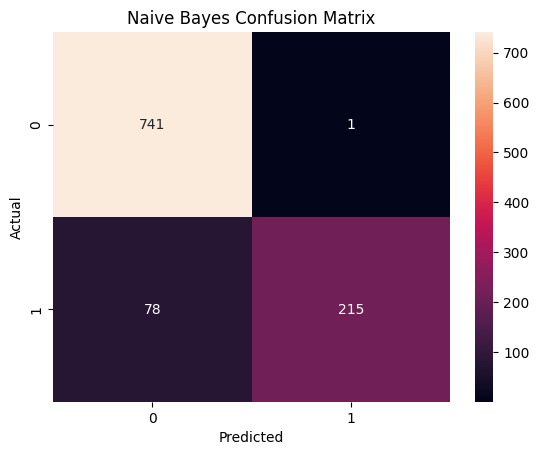

In [36]:
# MODEL 1 — NAIVE BAYES

# Train Naive Bayes 
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict
nb_pred = nb_model.predict(X_test_tfidf)

# Evaluate Naive Bayes 
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, nb_pred))

# Confusion Matrix 
cm = confusion_matrix(y_test, nb_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

 


In [37]:
# MODEL 2 — LOGISTIC REGRESSION

# Train Logistic Regression

lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
# Predict 
lr_pred = lr_model.predict(X_test_tfidf)



In [39]:
# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.9903381642512077

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       742
           1       0.98      0.99      0.98       293

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035



In [ ]:
# Confusion Matrix

cm2 = confusion_matrix(y_test, lr_pred)

plt.figure()
sns.heatmap(cm2, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [40]:
# Custom Message Testing
def predict_spam(message):
    message_tfidf = vectorizer.transform([message])
    prediction = lr_model.predict(message_tfidf)
    
    if prediction[0] == 1:
        return "Spam Message"
    else:
        return "Not Spam"

# Test
print(predict_spam("Congratulations! You have won a free lottery ticket"))
print(predict_spam("Hey bro, are we meeting today?"))

Spam Message
Not Spam
